# 02. PHÂN TÍCH TƯƠNG QUAN & KIỂM TRA ĐA CỘNG TUYẾN

## Pearson Correlation & Variance Inflation Factor (VIF)

**Mục đích chính:**
- Xác định mối quan hệ tuyến tính giữa FDI, GDP_Growth, Trade_Openness
- Đo lường mức độ đa cộng tuyến giữa các biến độc lập
- Kiểm tra giả định của mô hình hồi quy Panel

**Công thức:**
- Pearson Correlation: $r = \frac{\sum(X-\bar{X})(Y-\bar{Y})}{\sqrt{\sum(X-\bar{X})^2\sum(Y-\bar{Y})^2}}$
- VIF: $VIF_i = \frac{1}{1-R_i^2}$ (VIF > 10 → đa cộng tuyến cao)

**Ngưỡng VIF:** <5 (thấp), 5-10 (trung bình), >10 (cao)

---

## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Data

In [10]:
df = pd.read_csv('../01_Data/02_Processed/ASEAN_Transformed_Data.csv')
print(f"✅ Data loaded: {df.shape}")
df.head()

✅ Data loaded: (225, 13)


,Country,Country_Code,Year,FDI,GDP_Growth,Exports_pct_GDP,Imports_pct_GDP,Trade_Openness,FDI_log,Trade_Openness_log,FDI_log_scaled,GDP_Growth_scaled,Trade_Openness_log_scaled
0,Brunei Darussalam,BRN,2000,5.496072e+08,3.474676,56.970296,30.085037,87.055333,22.352499,4.477965,-0.368077,-0.396739,-0.481737
1,Brunei Darussalam,BRN,2001,6.069464e+07,1.466061,57.929572,33.170216,91.099788,22.251721,4.522873,-0.426671,-1.006672,-0.400598
2,Brunei Darussalam,BRN,2002,2.296720e+08,3.961439,56.655974,36.560207,93.216181,22.287712,4.545592,-0.405745,-0.248929,-0.359549
3,Brunei Darussalam,BRN,2003,1.238209e+08,3.583429,58.420889,30.664727,89.085616,22.265319,4.500761,-0.418765,-0.363715,-0.440551
4,Brunei Darussalam,BRN,2004,1.132059e+08,0.104538,57.766185,27.115981,84.882166,22.263045,4.452976,-0.420087,-1.420110,-0.526888


## 3. PEARSON CORRELATION MATRIX

In [11]:
# Select numeric columns
numeric_cols = ['FDI', 'GDP_Growth', 'Trade_Openness', 'FDI_log', 'Trade_Openness_log']
corr_matrix = df[numeric_cols].corr(method='pearson')

print("📊 Pearson Correlation Matrix:")
print(corr_matrix)
print("\n")

📊 Pearson Correlation Matrix:
                         FDI  GDP_Growth  Trade_Openness   FDI_log  \
FDI                 1.000000    0.003154        0.618796  0.453443   
GDP_Growth          0.003154    1.000000        0.054151  0.050015   
Trade_Openness      0.618796    0.054151        1.000000  0.339514   
FDI_log             0.453443    0.050015        0.339514  1.000000   
Trade_Openness_log  0.499944    0.053935        0.941586  0.278680   

                    Trade_Openness_log  
FDI                           0.499944  
GDP_Growth                    0.053935  
Trade_Openness                0.941586  
FDI_log                       0.278680  
Trade_Openness_log            1.000000  




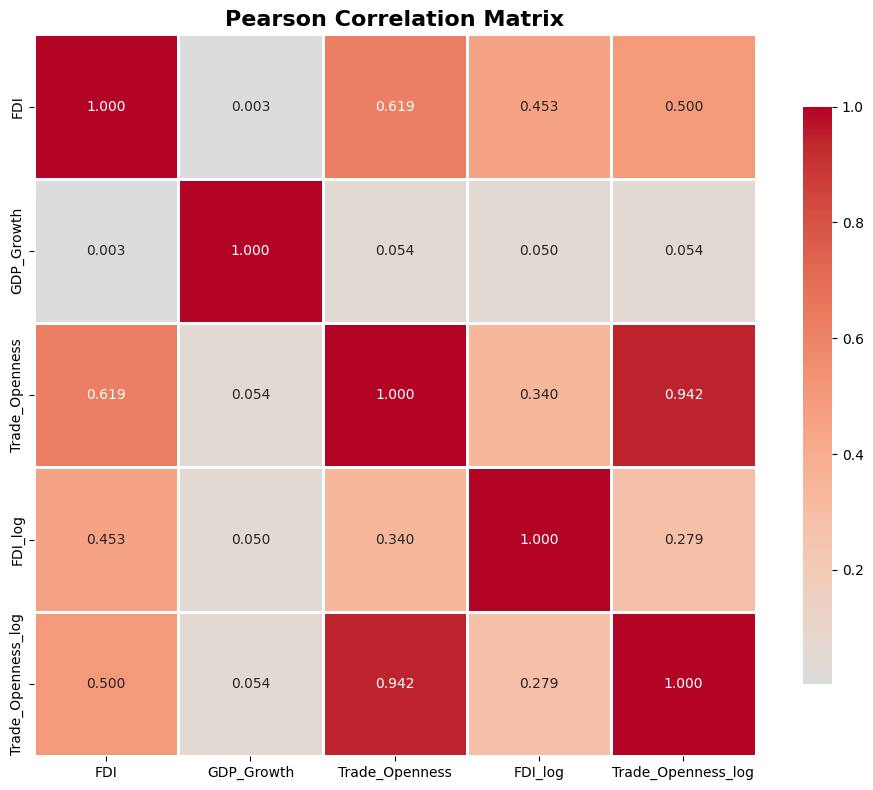

✅ Correlation matrix saved!


In [12]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../03_Results/03_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation matrix saved!")

In [13]:
# Statistical significance
print("🔍 Correlation with p-values:")
print("="*60)

r1, p1 = pearsonr(df['FDI'], df['Trade_Openness'])
print(f"FDI vs Trade_Openness:")
print(f"  r = {r1:.4f}, p = {p1:.4e}")
print(f"  {'✅ Significant' if p1 < 0.05 else '❌ Not significant'}\n")

r2, p2 = pearsonr(df['FDI'], df['GDP_Growth'])
print(f"FDI vs GDP_Growth:")
print(f"  r = {r2:.4f}, p = {p2:.4f}")
print(f"  {'✅ Significant' if p2 < 0.05 else '❌ Not significant'}\n")

r3, p3 = pearsonr(df['Trade_Openness'], df['GDP_Growth'])
print(f"Trade_Openness vs GDP_Growth:")
print(f"  r = {r3:.4f}, p = {p3:.4f}")
print(f"  {'✅ Significant' if p3 < 0.05 else '❌ Not significant'}")

🔍 Correlation with p-values:
FDI vs Trade_Openness:
  r = 0.6188, p = 3.6032e-25
  ✅ Significant

FDI vs GDP_Growth:
  r = 0.0032, p = 0.9625
  ❌ Not significant

Trade_Openness vs GDP_Growth:
  r = 0.0542, p = 0.4189
  ❌ Not significant


## 4. VIF CHECK (Variance Inflation Factor)

In [14]:
# Select features for VIF
features = ['GDP_Growth', 'Trade_Openness']
X = df[features].dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(features))]

print("📊 VIF (Variance Inflation Factor):")
print("="*60)
print(vif_data)
print("\n📝 Interpretation:")
print("  VIF < 5: Low multicollinearity ✅")
print("  VIF 5-10: Moderate multicollinearity ⚠️")
print("  VIF > 10: High multicollinearity ❌")

# Check results
max_vif = vif_data['VIF'].max()
if max_vif < 5:
    print(f"\n✅ No serious multicollinearity detected (max VIF = {max_vif:.2f})")
elif max_vif < 10:
    print(f"\n⚠️ Moderate multicollinearity detected (max VIF = {max_vif:.2f})")
else:
    print(f"\n❌ Serious multicollinearity detected (max VIF = {max_vif:.2f})")

📊 VIF (Variance Inflation Factor):
          Feature       VIF
0      GDP_Growth  1.987918
1  Trade_Openness  1.987918

📝 Interpretation:
  VIF < 5: Low multicollinearity ✅
  VIF 5-10: Moderate multicollinearity ⚠️
  VIF > 10: High multicollinearity ❌

✅ No serious multicollinearity detected (max VIF = 1.99)


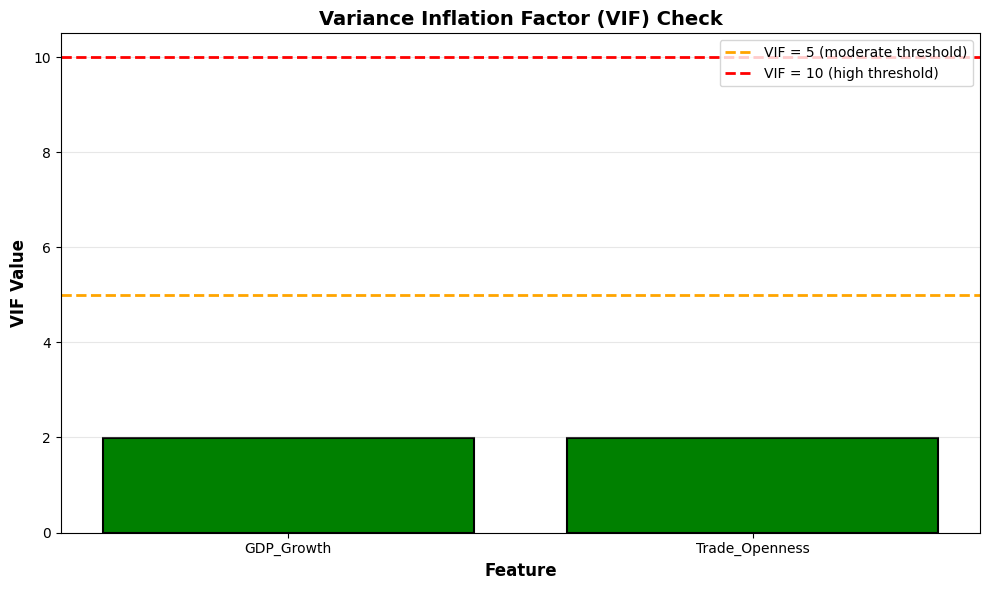


✅ VIF check completed & saved!


In [15]:
# Visualization
plt.figure(figsize=(10, 6))
colors = ['green' if v < 5 else ('orange' if v < 10 else 'red') for v in vif_data['VIF']]
plt.bar(vif_data['Feature'], vif_data['VIF'], color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=5, color='orange', linestyle='--', label='VIF = 5 (moderate threshold)', linewidth=2)
plt.axhline(y=10, color='red', linestyle='--', label='VIF = 10 (high threshold)', linewidth=2)
plt.xlabel('Feature', fontsize=12, fontweight='bold')
plt.ylabel('VIF Value', fontsize=12, fontweight='bold')
plt.title('Variance Inflation Factor (VIF) Check', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../03_Results/04_VIF_Check.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ VIF check completed & saved!")

## 5. Summary

In [16]:
print("="*70)
print("📊 CORRELATION & VIF ANALYSIS SUMMARY")
print("="*70)

print("\n✅ Correlation Analysis:")
print(f"  - FDI vs Trade_Openness: r = {r1:.4f} (p = {p1:.4e})")
print(f"  - FDI vs GDP_Growth: r = {r2:.4f} (p = {p2:.4f})")
print(f"  - Trade_Openness vs GDP_Growth: r = {r3:.4f} (p = {p3:.4f})")

print("\n✅ VIF Check:")
for idx, row in vif_data.iterrows():
    status = "✅ OK" if row['VIF'] < 5 else ("⚠️ Moderate" if row['VIF'] < 10 else "❌ High")
    print(f"  - {row['Feature']}: VIF = {row['VIF']:.2f} {status}")

print("\n" + "="*70)

📊 CORRELATION & VIF ANALYSIS SUMMARY

✅ Correlation Analysis:
  - FDI vs Trade_Openness: r = 0.6188 (p = 3.6032e-25)
  - FDI vs GDP_Growth: r = 0.0032 (p = 0.9625)
  - Trade_Openness vs GDP_Growth: r = 0.0542 (p = 0.4189)

✅ VIF Check:
  - GDP_Growth: VIF = 1.99 ✅ OK
  - Trade_Openness: VIF = 1.99 ✅ OK

